In [54]:
import spikeinterface
import spikeinterface.extractors as se 
import  spiketoolkit as st
import spikeinterface.sorters as ss
import spikeinterface.widgets as sw
import matplotlib.pylab as plt
import numpy as np
%matplotlib notebook
import spikeinterface.preprocessing as spp
import spiketoolkit.postprocessing as spost

C:\Users\Lenovo\anaconda3\Lib\site-packages\spikeinterface\widgets\widget_list.py:148: UserWarning: plot_timeseries() is now plot_traces()
  warnings.warn("plot_timeseries() is now plot_traces()")


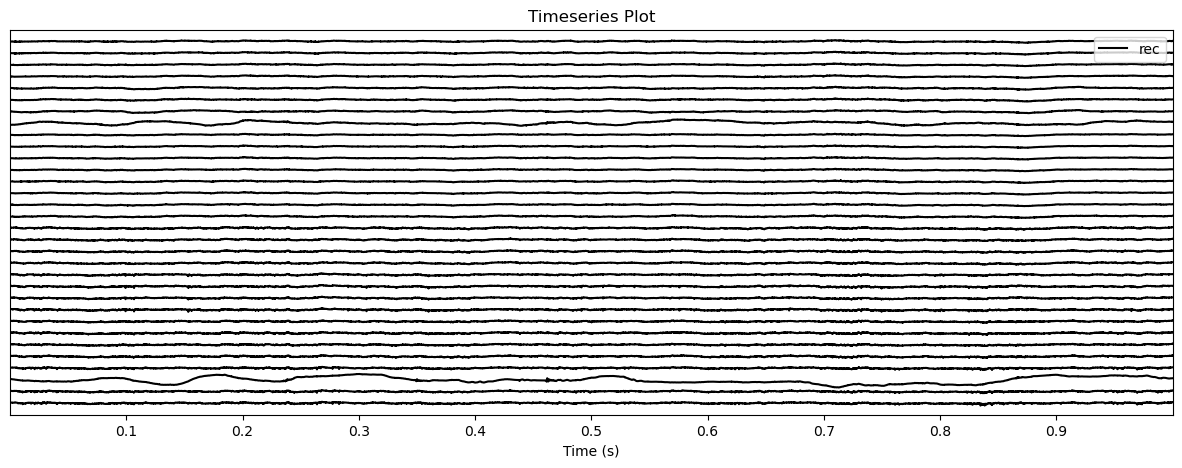

In [3]:
recording_folder = 'C:/Users/Lenovo/spiketutorials/old_api'
recording = se.read_openephys(recording_folder)


fig, ax = plt.subplots(figsize=(15, 5))
sw.plot_timeseries(recording, ax=ax)  


ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (uV)')
ax.set_title('Timeseries Plot')



plt.show()


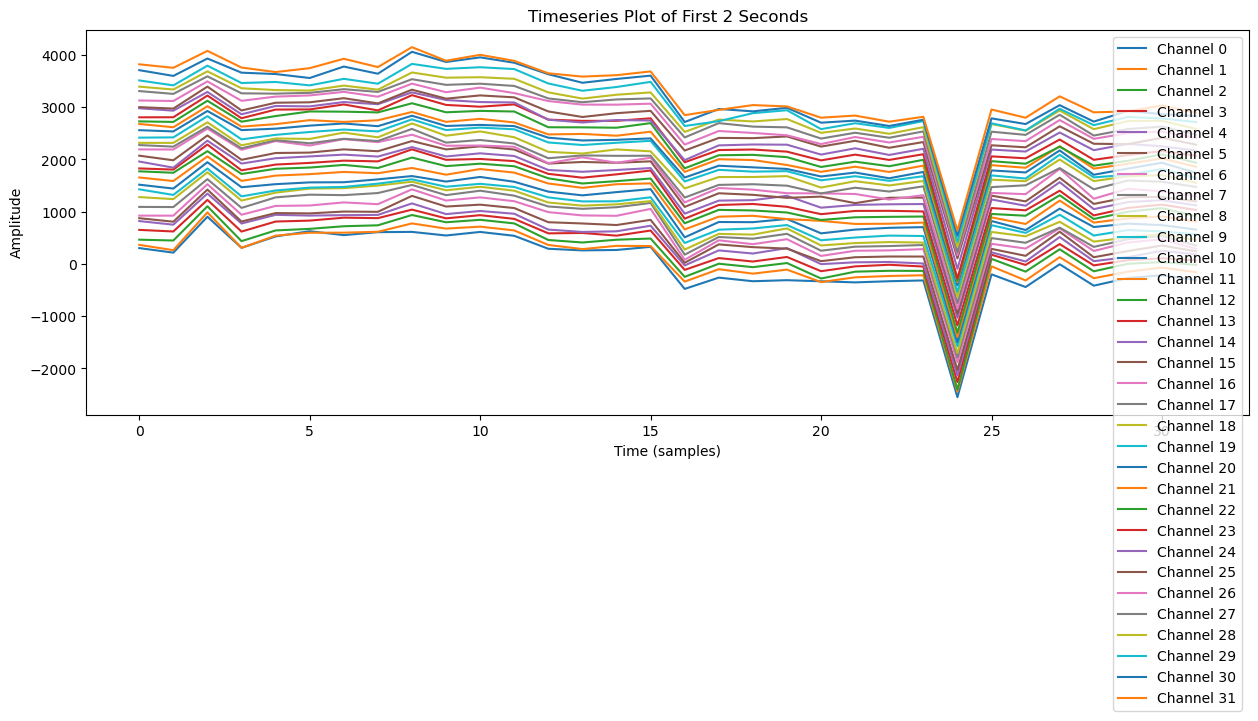

In [2]:
sampling_frequency = recording.get_sampling_frequency()
num_channels = recording.get_num_channels()

# Define the time range to plot (e.g., first 2 seconds)
start_frame = 0
end_frame = int(sampling_frequency * 2)  # Plotting first 2 seconds

# Extract the traces for the specified time range
trace_snippet = recording.get_traces(start_frame=start_frame, end_frame=end_frame)

# Plot the traces using matplotlib
plt.figure(figsize=(15, 5))
for i in range(num_channels):
    plt.plot(trace_snippet[i] + i * 100, label=f'Channel {i}')  # Offset each channel for visualization

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Timeseries Plot of First 2 Seconds')
plt.legend()
plt.show()


In [4]:
duration = recording.get_num_frames() / sampling_frequency

print(f"Number of channels: {num_channels}")
print(f"Sampling frequency: {sampling_frequency} Hz")
print(f"Duration: {duration} seconds")

Number of channels: 32
Sampling frequency: 30000.0 Hz
Duration: 593.9370666666666 seconds


In [6]:
# Path to your probe file
probe_file = 'C:/Users/Lenovo/spiketutorials/old_api/NWB_Developer_Breakout_Session_Sep2020/tetrode_32.prb'

try:
    with open(probe_file, 'r', encoding='utf-8') as f:
        probe_content = f.read()
        print(probe_content)  # Print file contents
except FileNotFoundError:
    print(f"File not found: {probe_file}")
except Exception as e:
    print(f"An error occurred: {e}")


channel_groups = {
    # Tetrode index
    0:
        {
        'channels': [0, 1, 2, 3],
	'geometry': [[0,0], [1,0], [2,0], [3,0]],
        },
    1:
      	{
      	'channels': [4, 5, 6, 7],
	'geometry': [[6,0], [7,0], [8,0], [9,0]],
      	},
    2:
      	{
      	'channels': [8, 9, 10, 11],
	'geometry': [[12,0], [13,0], [14,0], [15,0]],
      	},
    3:
      	{
     	 'channels': [12, 13, 14, 15],
	 'geometry': [[18,0], [19,0], [20,0], [21,0]],
     	 },
    4:
	{
        'channels': [16, 17, 18, 19],
	'geometry': [[30,0], [31,0], [32,0], [33,0]],
        },
    5:
      	{
      	'channels': [20, 21, 22, 23],
	'geometry': [[36,0], [37,0], [38,0], [39,0]],
      	},
    6:
      	{
      	'channels': [24, 25, 26, 27],
	'geometry': [[42,0], [43,0], [44,0], [45,0]],
      	},
    7:
      	{
      	'channels': [28, 29, 30, 31],
	'geometry': [[48,0], [49,0], [50,0], [51,0]],
      	}
    }



In [ ]:
w_elec = sw.plot_electrode_geometry(probe_file, markersize=5)

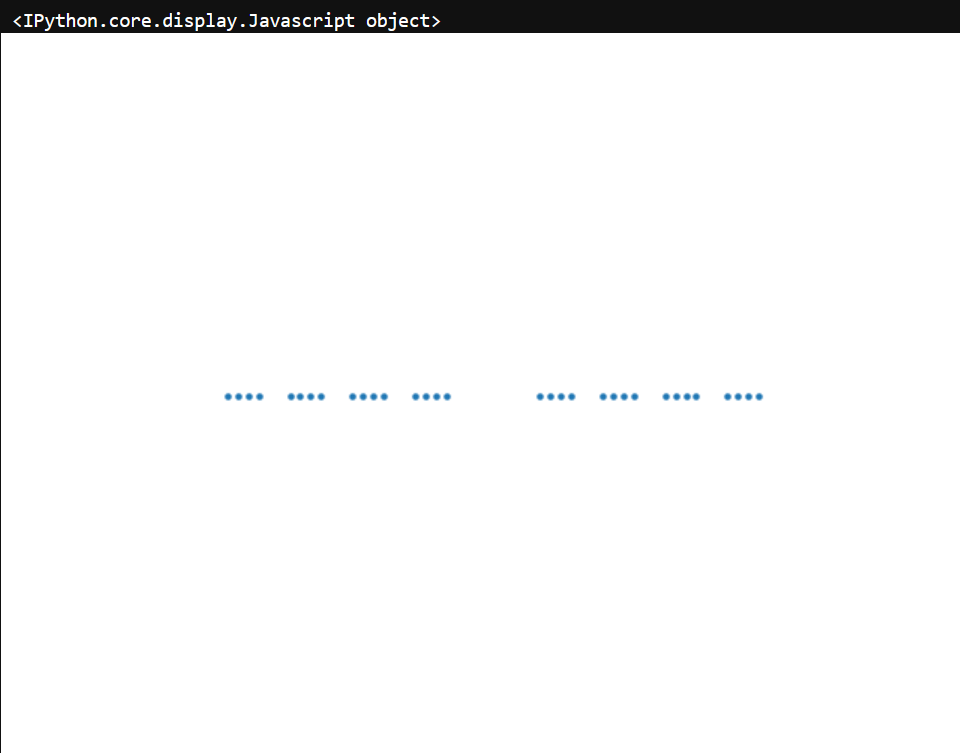

In [11]:
# Get channel IDs
channel_ids = recording.get_channel_ids()
print("Available channel IDs:", channel_ids)
print(len(channel_ids))

Available channel IDs: ['CH1' 'CH2' 'CH3' 'CH4' 'CH5' 'CH6' 'CH7' 'CH8' 'CH25' 'CH26' 'CH27'
 'CH28' 'CH29' 'CH30' 'CH31' 'CH32' 'CH33' 'CH34' 'CH35' 'CH36' 'CH37'
 'CH38' 'CH39' 'CH40' 'CH57' 'CH58' 'CH59' 'CH60' 'CH61' 'CH62' 'CH63'
 'CH64']
32


## Preprocessing

In [12]:
# Select the first 16 channel IDs
selected_channels = channel_ids[:16]
recording_selected = recording.channel_slice(selected_channels)
print(len(selected_channels))

16


C:\Users\Lenovo\anaconda3\Lib\site-packages\spikeinterface\widgets\widget_list.py:148: UserWarning: plot_timeseries() is now plot_traces()
  warnings.warn("plot_timeseries() is now plot_traces()")


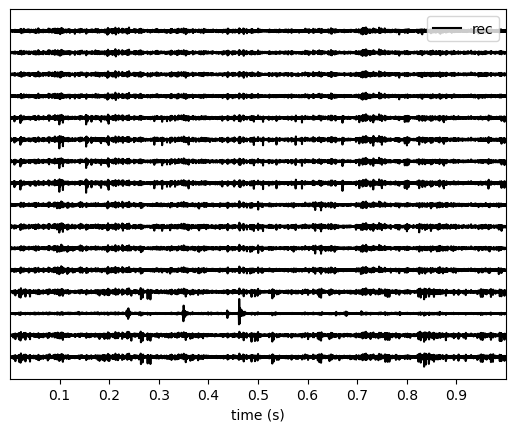

In [14]:
freq_min = 300   # Minimum frequency of the bandpass filter
freq_max = 3000  # Maximum frequency of the bandpass filter

# Apply the bandpass filter
filtered_recording = spp.bandpass_filter(recording_selected, freq_min=freq_min, freq_max=freq_max)

# Plot the filtered timeseries
sw.plot_timeseries(filtered_recording)
plt.show()

Selected channel IDs: ['CH1', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'CH25', 'CH26', 'CH27', 'CH28', 'CH29', 'CH30', 'CH31', 'CH32']


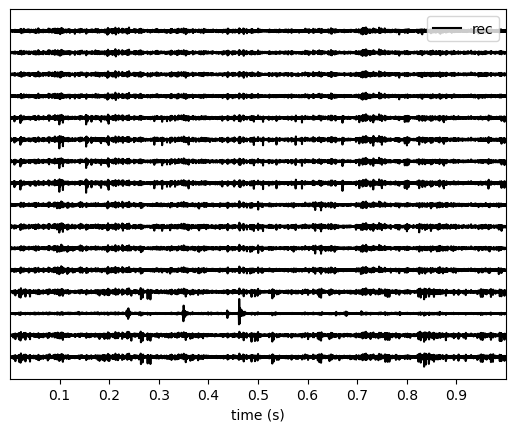

15


In [17]:
bad_channel ='CH2'
# Select all channels except the bad one
selected_channels = [ch for ch in selected_channels if ch != bad_channel]
print("Selected channel IDs:", selected_channels)

# Slice the recording to include only the selected channels
recording_selected = recording.channel_slice(selected_channels)
sw.plot_timeseries(filtered_recording)
plt.show()
print(len(selected_channels))

In [ ]:
recording_cmr = st.preprocessing.common_reference(recording_rm_noise, reference='median')

## spike sorting

In [ ]:
# run spike sorting by group (add picture)
sorting_KL = ss.run_klusta(recording_crm, adjacency_radius=50, 
                           output_folder='results_split_klusta', 
                           grouping_property='group', parallel=True)
print('Found', len(sorting_KL.get_unit_ids()), 'units')



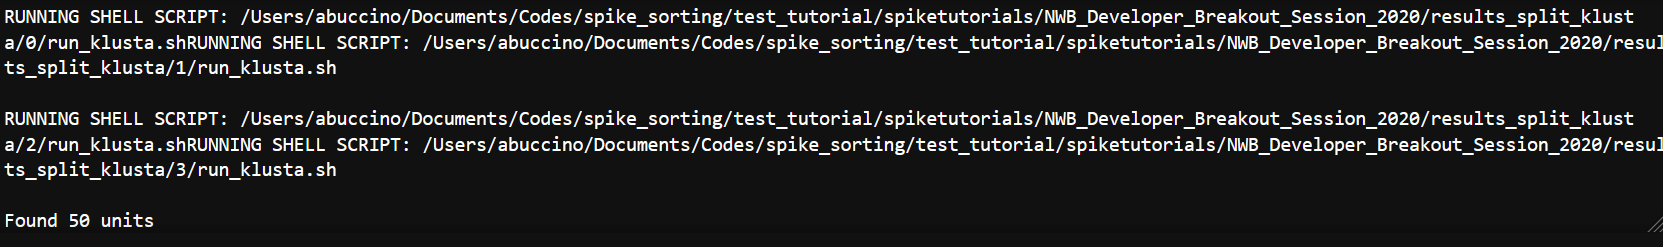

In [ ]:
sorting_KL.sortings

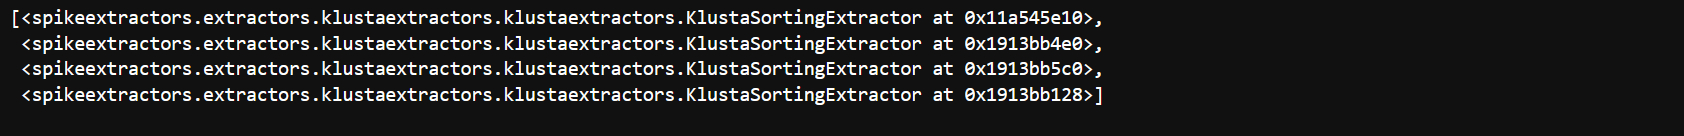

## Raster Plot

In [ ]:
w_rs = sw.plot_rasters(sorting_KL, trange=[0,10])

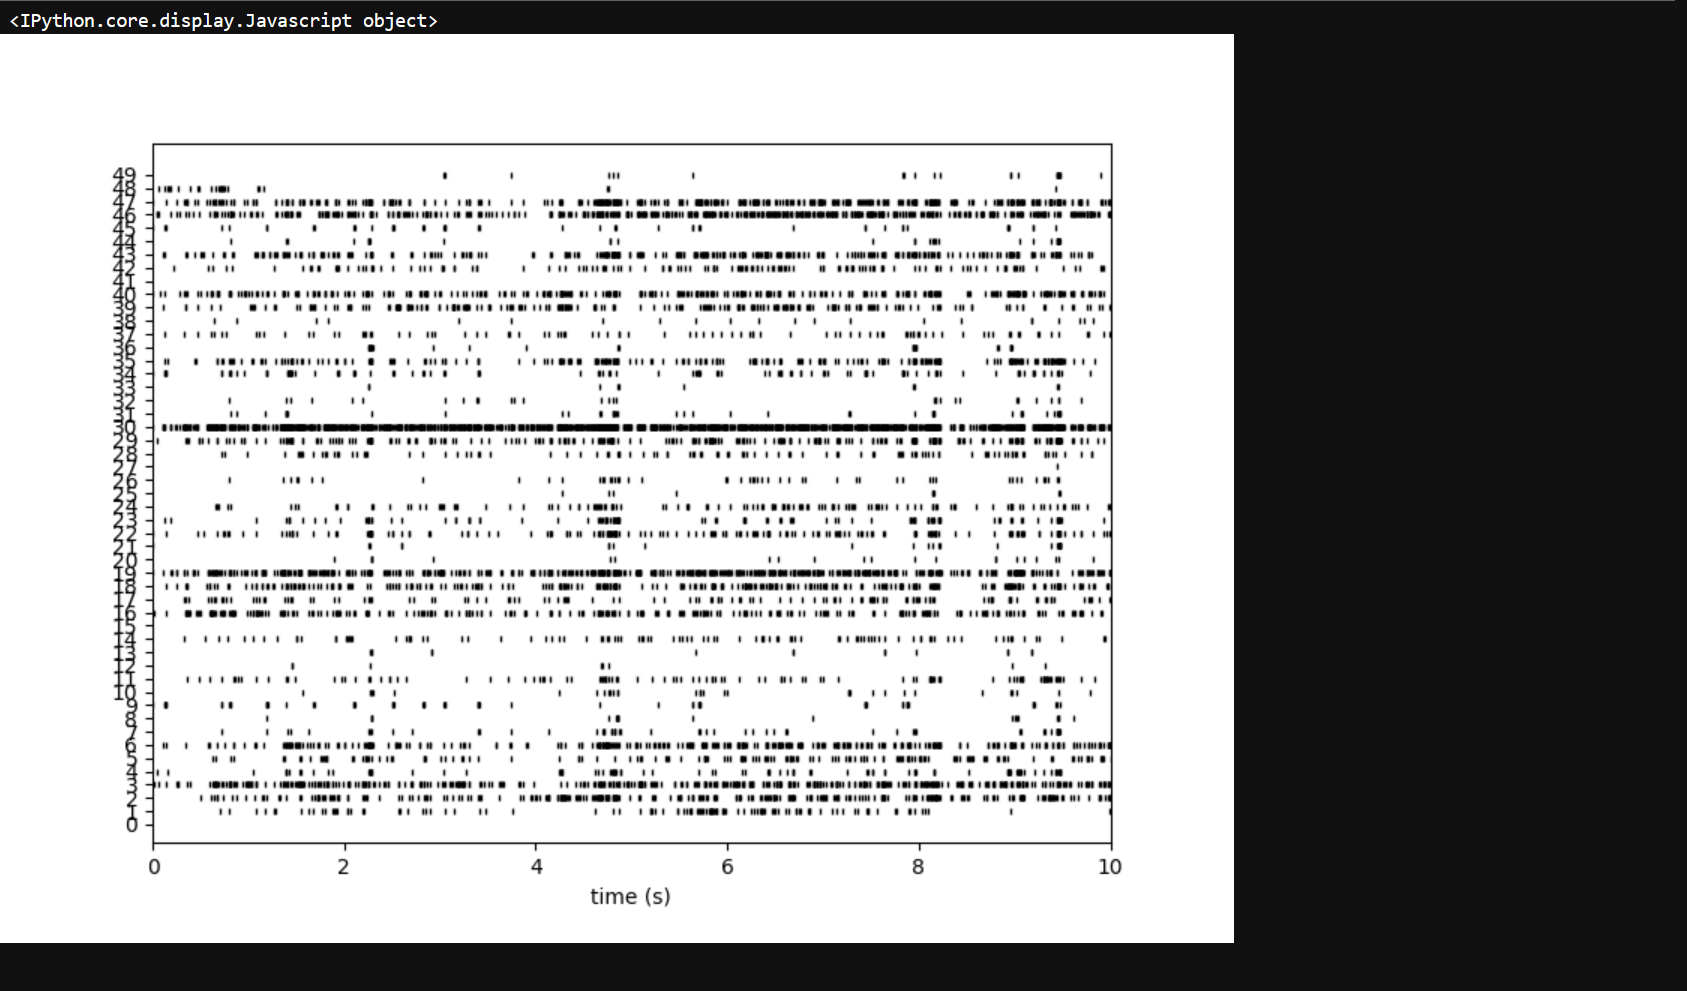